# Natural Language Processing (NLP) in Python

---

Briefly: NLP is all about computer programs being able to understand human language. This includes structure, meaning, and intent. 

#### Use cases
* Determining what people like based off their social media posts
* Predicting authorship based on analysis of previous writings
* Twitter sentiment analysis for finance/politics
* Figuring out who the smartest president was by their writings and speeches
* Machine translation
* Personal assistants
* Customer service chatbots

#### Eventually: Natural Language *Generation* (NLG)
First, use NLP to teach the computer how to **UNDERSTAND** language. Then you can teach the computer how to **GENERATE** language.

---

## Today
We'll use a few features of the **Natural Language ToolKit** (*NLTK*) library as it is the most popular, was written in Python, and is the easiest to use. 

We're going to:
1. Introduce the **lexicon**
2. Get the **corpus**/**corpora**
5. Introduce **stemming** and **lemmatizing**
2. **Tokenize** the text,
3. Remove **stop words**
4. Explore the text,
4. Do some basic sentiment analysis,
6. Discuss other topics

--- 

## Start: download and install NLTK

We just need the third-party packages, not the data. Downloading everything else takes a while, so **just select the popular packages on the popup.**

Install NLTK with pip or conda: 

**`pip install nltk`**

**`conda install nltk`**

In [3]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Lexicon

#### All the words in a language and their meanings.

We'll be using the American English lexicon.

---

## Corpus

#### A complete body of text to be analyzed. (plural: corpora)


### Our corpus: Trump's Tweets

The file trump_tweets.csv contains about 24,000 tweets written directly from Donald J. Trump's personal Twitter account @realDonaldTrump from 2009 to Febraury 5th, 2017. Sourced from the good folks at [Trump Twitter Archive](www.trumptwitterarchive.com). 

Download from my github or just import directly to your notebook via URL. (see below)
(https://github.com/russellromney/data_analysis/raw/master/trump_tweets.csv)

In [65]:
# import data
import pandas as pd
data = pd.read_csv('https://github.com/russellromney/data_analysis/raw/master/trump_tweets.csv')

#### Looking at the data

In [66]:
data.shape

(21116, 7)

In [67]:
data.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Thanks to the historic TAX CUTS that I signed ...,02-05-2018 20:42:01,10563.0,45189,false,9.606145e+17
1,Twitter for iPhone,Representative Devin Nunes a man of tremendous...,02-05-2018 15:08:51,25514.0,92820,false,9.605307e+17
2,Twitter for iPhone,Any deal on DACA that does not include STRONG ...,02-05-2018 14:36:40,22053.0,84337,false,9.605226e+17
3,Twitter for iPhone,Little Adam Schiff who is desperate to run for...,02-05-2018 12:39:10,35612.0,112271,false,9.604930e+17
4,Twitter for iPhone,Thank you to @foxandfriends for exposing the t...,02-05-2018 12:17:57,18313.0,82798,false,9.604877e+17


#### Check the latest tweet

In [68]:
data['text'][0]

'Thanks to the historic TAX CUTS that I signed into law your paychecks are going way UP your taxes are going way DOWN and America is once again OPEN FOR BUSINESS! https://t.co/GISFbDDGXX'

## Stemming


Stemming removes the affixes from words and returns the root word. This is used to reduce complexity and compress the size of a corpus, often by up to 50% or more. 
> rooting -> root

> working -> work

> purple -> purpl

The most popular method is the Porter stemming algorithm.

In [331]:
from nltk.stem import PorterStemmer
lang = ['increases','works','working','delayed','enthusiastically','work','funny','laughing','absolutely']
stemmer = PorterStemmer()
[stemmer.stem(word) for word in lang]

['increas',
 'work',
 'work',
 'delay',
 'enthusiast',
 'work',
 'funni',
 'laugh',
 'absolut']

## Lemmatizing

Somtimes your words still need to have meaning after they've been condensed. Lemmatizing is a form of stemming - but it only returns real words.

Sometimes the words don't change at all unless you specify the part of speech. Lemmatizing is also slower and has higher useful accuracy because it maintains context.

In [332]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(word) for word in lang]

['increase',
 'work',
 'working',
 'delayed',
 'enthusiastically',
 'work',
 'funny',
 'laughing',
 'absolutely']

## Tokenize

#### A token is a single unit of speech - a word, a clause, a sentence, etc. 
This allows us to analyze the tweets by word instead of by full tweet - it is much easier.

To do this we just need to split up our data into plain words while still keeping the tweets separate. 

> another way: use the `nltk.word_tokenizer()` or `nltk.sent_tokenizer()` functions; this is a little harder to work with though because you don't have direct access to the data.

In [103]:
# remove punctuation, transform to lower case, and split the tweets into lists of words
import re

data['tweet_words'] = [re.sub(r'[^A-Za-z]',' ',str(tweet)).lower().split() for tweet in data['text']]

In [333]:
# compare raw text vs tokenized text
print(data['text'][0],'\n')
print(data['tweet_words'][0])

Thanks to the historic TAX CUTS that I signed into law your paychecks are going way UP your taxes are going way DOWN and America is once again OPEN FOR BUSINESS! https://t.co/GISFbDDGXX 

['thanks', 'historic', 'tax', 'cuts', 'signed', 'law', 'paychecks', 'going', 'way', 'taxes', 'going', 'way', 'america', 'open', 'business', 'gisfbddgxx']


## Remove stop words

> Stop words are words that have no specific interpretable meaning, e.g. a, an, be, of, etc. 

They can get in the way because they have no inherent meaning.

In [112]:
from nltk.corpus import stopwords

# create stop words list
stop = stopwords.words('english')

#add other problematic words
## use list.extend() to add multiple items at instead of list.append()
stop.extend(('http','https','co','amp','via'))


In [334]:
# check to make sure it worked
stop[-1]

'via'

In [124]:
# loop through tweets to remove stopwords -- THIS IS NOT EFFICIENT BUT IT IS EASY TO UNDERSTAND
for tweet in data['tweet_words']:
    for word in tweet:
        if word in stop:
            tweet.remove(word)

In [161]:
print(data['text'][0],'\n')
print(data['tweet_words'][0])

Thanks to the historic TAX CUTS that I signed into law your paychecks are going way UP your taxes are going way DOWN and America is once again OPEN FOR BUSINESS! https://t.co/GISFbDDGXX 

['thanks', 'historic', 'tax', 'cuts', 'signed', 'law', 'paychecks', 'going', 'way', 'taxes', 'going', 'way', 'america', 'open', 'business', 'gisfbddgxx']


---

# Exploring the data

## Word frequency

In [168]:
words = []
for text in data['tweet_words']:
    for word in text: 
        if word not in stop: words.append(word)

In [185]:
pd.Series(words).value_counts()[:20]

great          2903
trump          2364
thank          1314
obama          1289
people         1144
thanks         1067
new            1056
america         862
get             855
time            820
big             816
make            765
barackobama     723
good            722
like            710
u               701
one             679
today           674
country         643
never           634
dtype: int64

### Tweet Length

The average number of meaningful words in each tweet.

In [194]:
import statistics
# median
statistics.median([len(tweet) for tweet in data['tweet_words']])

13.0

In [196]:
# mean
statistics.mean([len(tweet) for tweet in data['tweet_words']])

12.453826482288312

In [201]:
# raw tweet length
statistics.median([len(str(tweet)) for tweet in data['text']])

118.0

In [202]:
statistics.mean([len(str(tweet)) for tweet in data['text']])

111.07373555597651

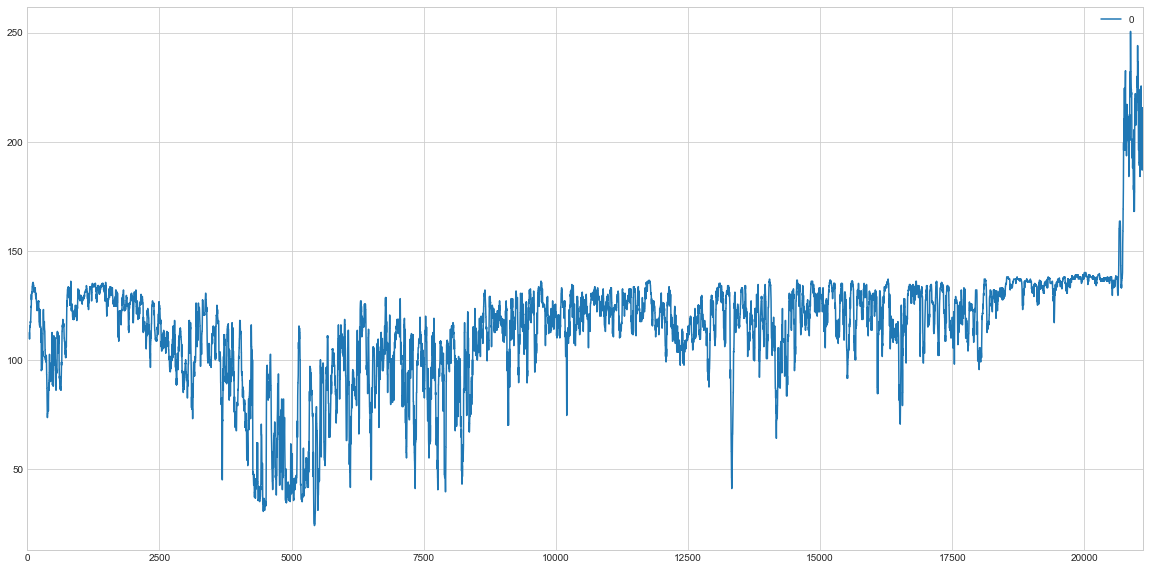

In [241]:
# how Trump's tweets' length have changed over time
pd.DataFrame([len(str(tweet)) for tweet in data['text'][::-1]]).rolling(window=40,center=False).median().plot(figsize=(20,10))

---

# Sentiment Analysis

Sentiment analysis tries to assign each token a certain sentiment.

There are several sentiment assignment libraries including:
* **AFINN** which gives a score from -5 to 5
* **bing** which defines words in a binary fashion as either positive or negative

We'll use the AFINN library for this example.

In [247]:
afinn = pd.read_csv('https://raw.githubusercontent.com/russellromney/data_analysis/master/afinn.csv')
afinn.head(15)

,Unnamed: 0,word,score
0,20689,abandon,-2.0
1,20690,abandoned,-2.0
2,20691,abandons,-2.0
3,20692,abducted,-2.0
4,20693,abduction,-2.0


#### Create a dictionary of sentiment values

In [248]:
d = {}
for i in range(len(afinn)):
    d[afinn['word'][i]] = afinn['score'][i]

#### Find the sum of the sentiment score for each tweet

There are many ways we could do this. We could take the difference of the extremes of positive/negative; we could take the average. We'll try both. 

In [282]:
import statistics

data['afinn_score_sum'] = pd.Series([sum([d.get(word,0) for word in tweet]) for tweet in data['tweet_words']])
print(data[['text','afinn_score_sum']].head())

                                                text  afinn_score_sum
0  Thanks to the historic TAX CUTS that I signed ...              1.0
1  Representative Devin Nunes a man of tremendous...              6.0
2  Any deal on DACA that does not include STRONG ...              0.0
3  Little Adam Schiff who is desperate to run for...             -8.0
4  Thank you to @foxandfriends for exposing the t...              3.0


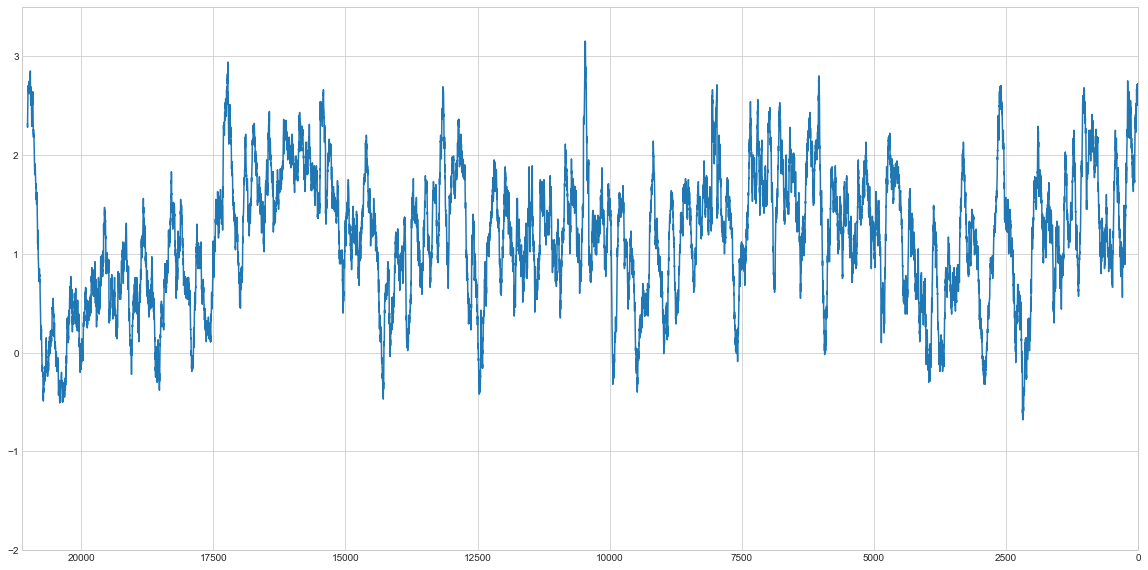

In [311]:
data['afinn_score_sum'][::-1].rolling(window=100).mean().plot(figsize=(20,10),ylim=(-2,3.5))

In [321]:
data[data.index==2650]

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,tweet_words,afinn_score_sum
2650,Twitter for Android,TODAY WE MAKE AMERICA GREAT AGAIN!,11-08-2016 11:43:14,344806.0,573283,false,7.959548e+17,"[today, make, america, great]",3.0


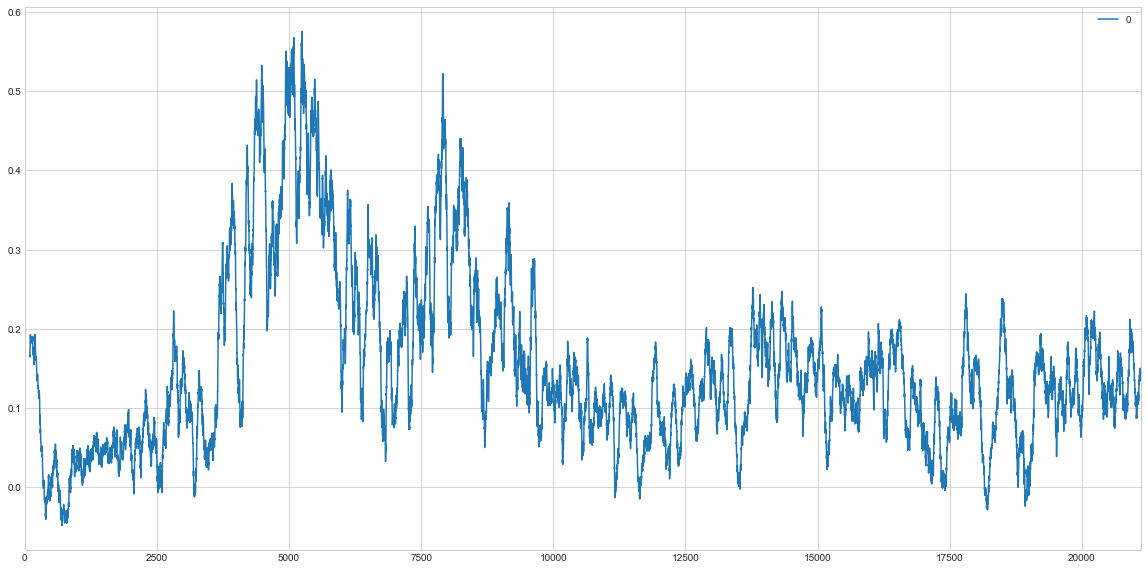

In [290]:
# averages of scores 
pd.DataFrame([statistics.mean([d.get(word,0) for word in tweet]) for tweet in data['tweet_words'][::-1] if len(tweet)>0]).rolling(window=100).mean().plot(figsize=(20,10))

# Other very interesting topics

* **Creating a predictive model to guess how many likes/retweets a tweet has**
* **Comparing the tweets and sentiments, etc. to other twitter users**
* **Analyzing sentences rather than words**
* **Using NLP to create recommender systems**
> there are a lot of very interesting things you can do with NLP!